![title](pictures/race.png)
![title](pictures/race2.png)

In [15]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
def plot_track(data):
    grid_size=len(data)
    # create discrete colormap
    cmap = colors.ListedColormap(['black', 'white','red', 'green', 'blue', 'grey', 'brown'])
    bounds = [-2,0,2,4,6,8,10,12]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, grid_size, 1));
    ax.set_yticks(np.arange(-.5, grid_size, 1));


    
    
    plt.show()
    

def grid_type(w):
    if w == 'out':
        return -1
    if w == 'normal':
        return 1
    if w == 'start':
        return 3
    if w == 'end':
        return 5
def get_path(p1,p2):
    print(p1,p2)
    
    # symmetries
    if p1[0] > p2[0]:
        p_old = p1
        p1 = p2
        p2 = p_old
    
    x1 , y1 = p1
    x2 , y2 = p2
    
    flip = 1
    if y1 > y2:
        flip = -1
        y2 = 2*(y1 + - y2/2)
    # extreme cases
    if y1 == y2:
        return [(x1+e,y1) for e in range(1,x2 - x1 + 1)]
    if x1 == x2:
        return [(x1,y1+e) for e in range(1,y2 - y1 + 1)] 
    #print('A')

    
    # another extreme case
    if float(x2-x1 - 1) >0:
        m = (y2 - y1 - 1)/float(x2-x1-1)
    else:
        m = (y2 - y1 - 1)/float(x2-x1)

    dx = 0.
    dy = 0.
    s = int(abs(y2 - y1) + abs(x1-x2))
    steps = []

    if m>=0.5:
        dy += 1.
    else:
        dx += 1.
    steps.append((dx,dy))


    for e in range(1,s-1):
        if dx == 0:
            if m*0.5 <= dy:
                dx += 1
                steps.append((1,0))
            else:
                dy +=1
                steps.append((0,1))

        else:
            #print('B')
            n = dy/(dx)
            #print(n,m)
            if n<m:
                dy +=1
                steps.append((0,1))
            else:
                dx +=1
                steps.append((1,0))
    points = [p1]
    for s in steps:
        points.append((int(s[0])+points[-1][0], int(s[1]*flip)+points[-1][1]))
    
    if p2 not in points:
        points.append(p2)
    return points



## Create example track

In [16]:
def create_data(visualization = True):
    
    grid_size = 30
    #white
    data = np.ones((grid_size, grid_size))
    if visualization:
        #start
        data[-1:,:] = 3
        #end
        data[:,-1:] = 5

    data[:2,:] = -1
    data[:,:2] = -1
    data[:11,:12] = -1
    data[:18,:7] = -1

    data[8:,20:] = -1
    data[25:,8:] = -1
    data[16:,15:] = -1
    return data    #plot_track(data)

In [17]:
def is_valid_path(path, data):
    for e in path:
        if data[e] == -1:
            return False
    return True

In [28]:
data = create_data(visualization = False)
viz = create_data()
p1 = (13,13)
p2 = (21,8)
viz[p2] = 6
viz[p1] = 6

path = get_path(p1,p2)



for e in path:
    if data[e] == -1:
        viz[e] = 10
    else:
        viz[e] = 8
viz[p2] = 7
viz[p1] = 7


(13, 13) (21, 8)


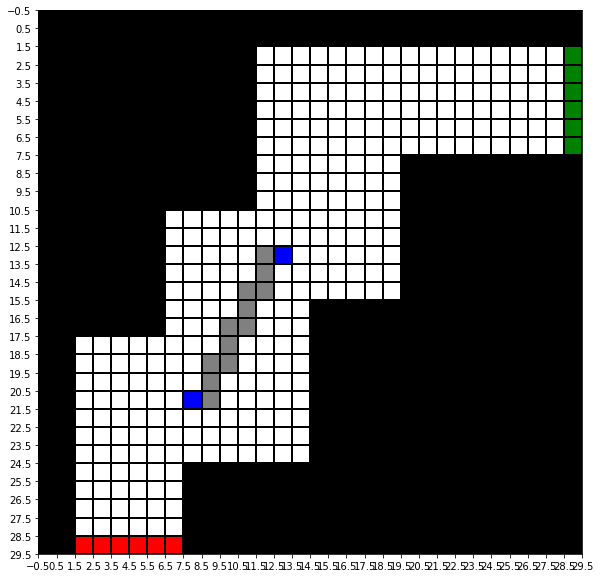

In [29]:
plot_track(viz)